In [1]:
import os
import json
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## These do not include temporal data to plot
EXCLUDE = set(["task-python.json", "task-users.json", "task-system.json"])

In [4]:
json_files = set([f for f in os.listdir(".") if f[-len('.json'):] == ".json"]) - EXCLUDE

In [5]:
def make_content_arrays(content_arrays, contents, date, key=None):
    """Converts to a format that can be easily plotted. 
       Add contents on a given date to content_arrays. 
       content_arrays will be similar to content_arrays, but its leafs
       will be lists of tuples, consisting of the date and values.
    """
    
    # Most of the data is organized in dicts.
    if isinstance(contents, dict):
        for key, val in contents.items():
            if key not in content_arrays:
                content_arrays[key] = {}
            make_content_arrays(content_arrays[key], val, date, key)
            
    # Some of the data appears in lists. The items in the lists often have
    # a 'label'. Handle this special case, and if a label is not found just
    # use the index.
    elif isinstance(contents, list):
        for i, el in enumerate(contents):
            if 'label' in el:
                new_key = key + ": " + el['label']
            else:
                new_key = key + ": " + str(i)
            if new_key not in content_arrays:
                content_arrays[new_key] = {}
            make_content_arrays(content_arrays[new_key], el, date)
            
    # Append the entry
    else:
        if key not in content_arrays:
            content_arrays[key] = []
        content_arrays[key].append((date, contents))

In [6]:
def plot_content_arrays(content_arrays, title_append=""):
    for key, val in content_arrays.items():
        if isinstance(val, dict):
            plot_content_arrays(val, title_append = title_append + " " + key)
        else:
            try:
                dates, values = zip(*val)

                # Don't make a plot of all empty values.
                if not any(values):
                    continue

                # Can't plot strings, so skip them.
                if any([isinstance(v, str) for v in values]):
                    continue

                plt.figure(figsize=(10,5))
                plt.plot(dates, values)
                plt.title(title_append)
                plt.show()
            except ValueError as e:
                print(values)
                print(e)

In [7]:
def date_to_npdate(date):
    day, time, zone = date.split()
    return day+"T"+time

In [8]:
def process_and_plot(data):
    dates = data['dates']

    ## Use a different formatting for the dates.
    npdates = np.array(list(map(date_to_npdate, dates)), dtype='datetime64').astype(datetime)

    content_arrays = {}
    for i, date in enumerate(npdates):
        content_at_step = json.loads(data['content'][i])
        make_content_arrays(content_arrays, content_at_step, date)
    plot_content_arrays(content_arrays)

file: task-memory.json


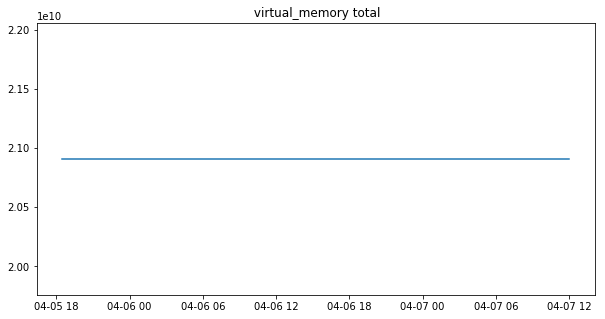

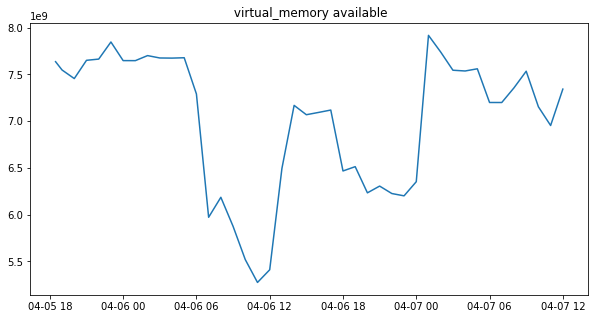

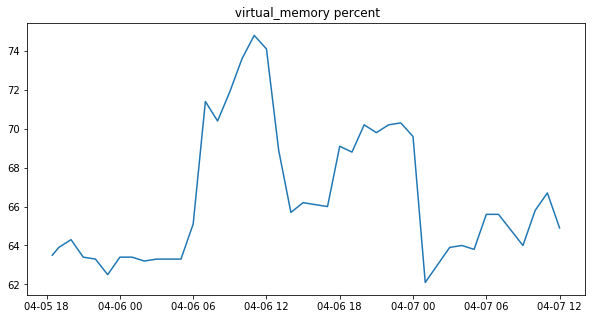

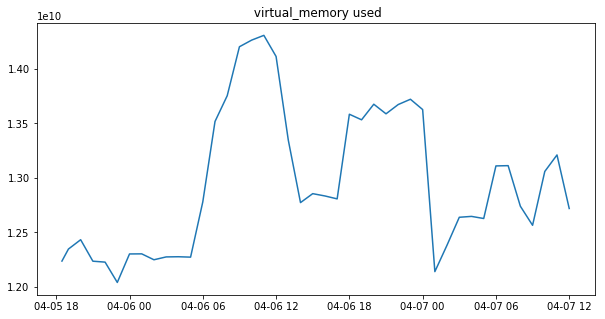

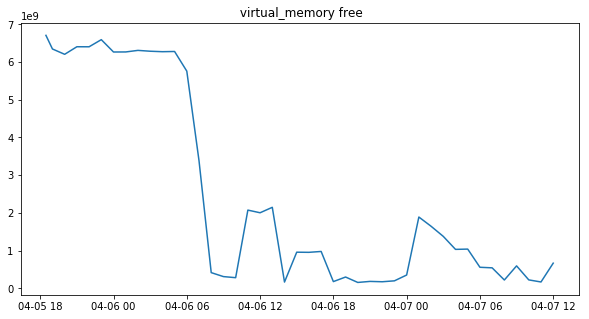

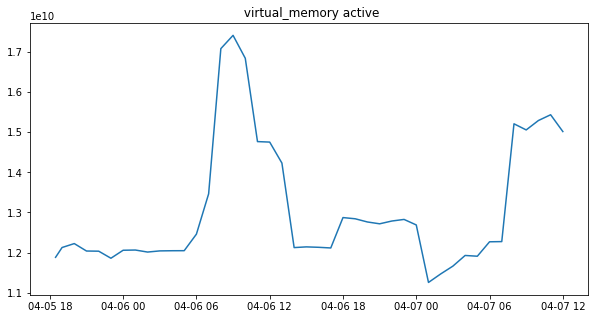

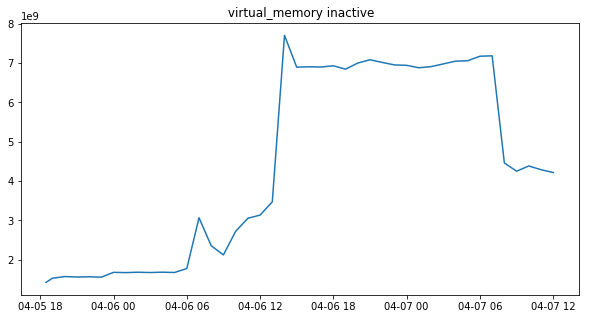

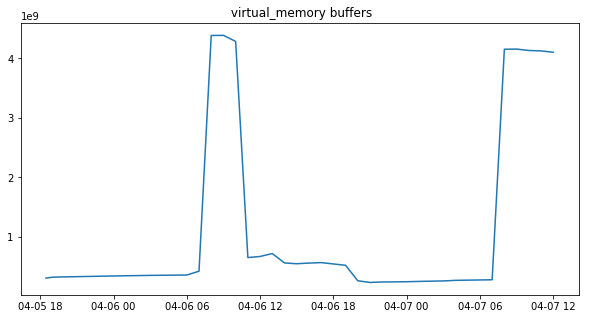

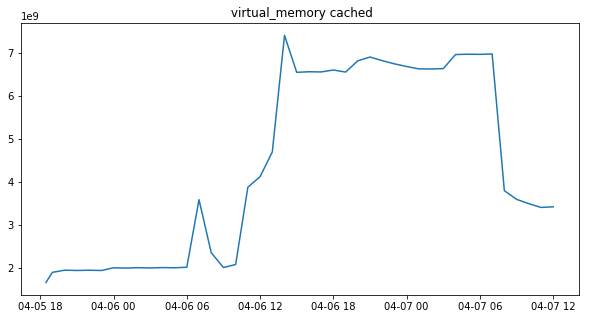

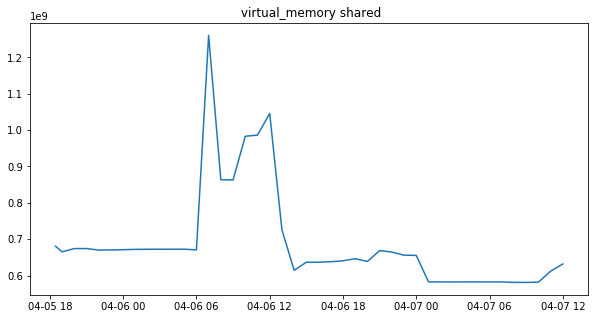

file: task-sensors.json


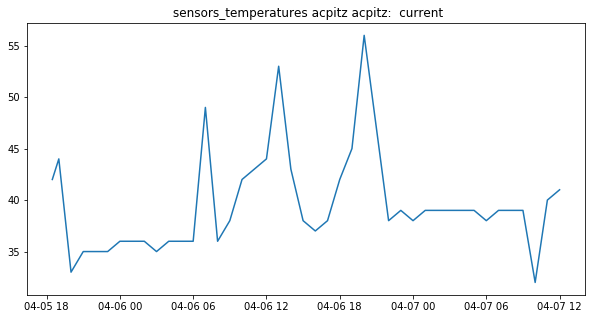

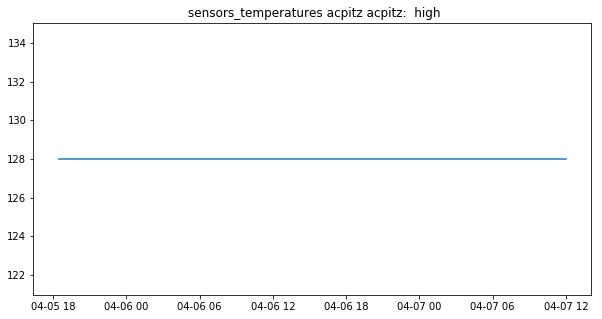

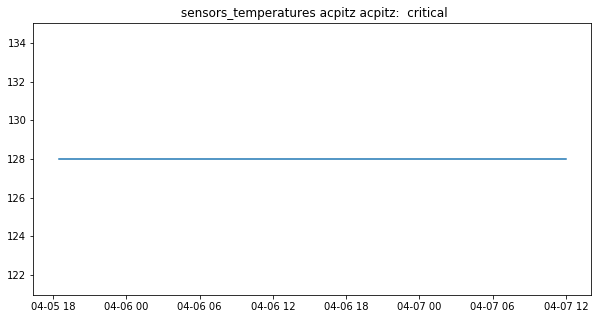

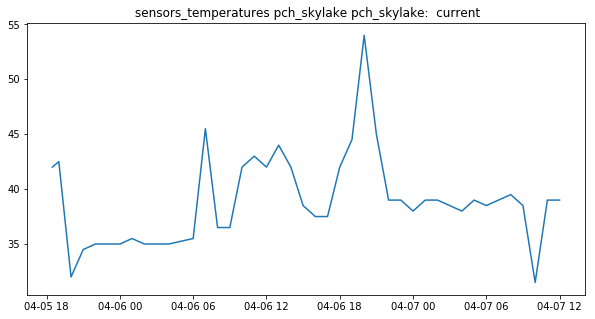

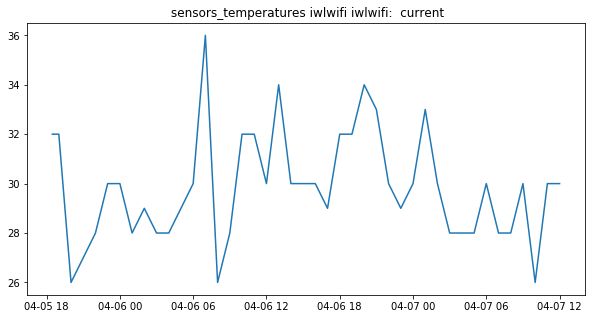

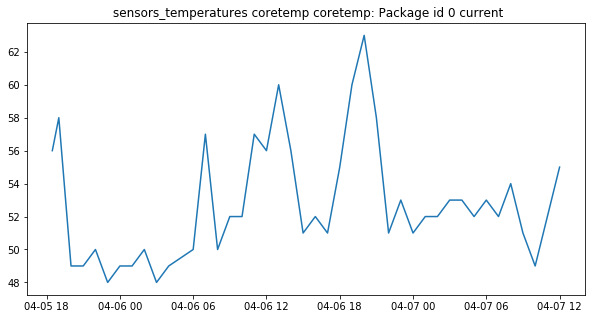

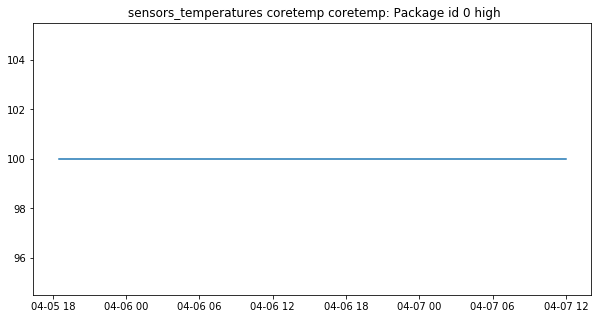

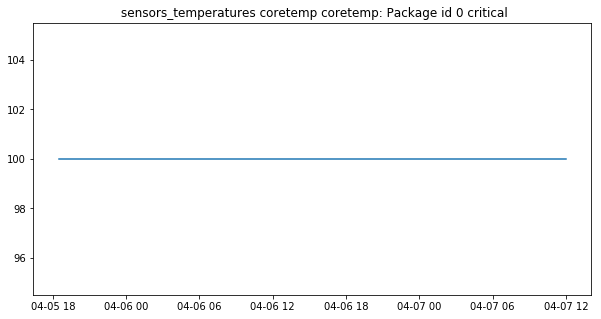

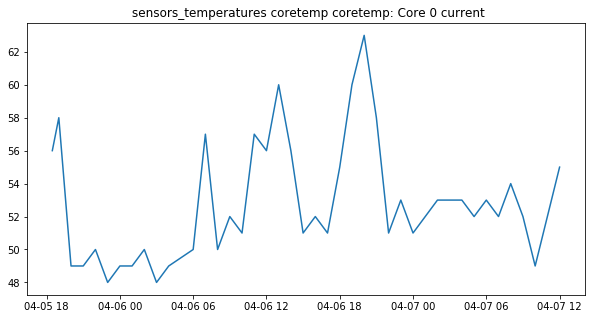

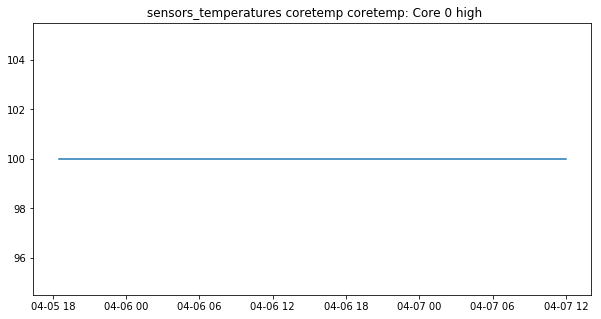

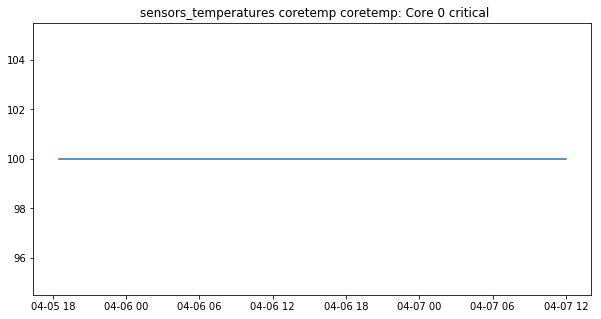

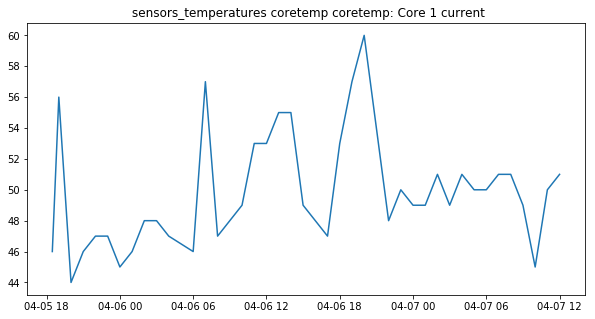

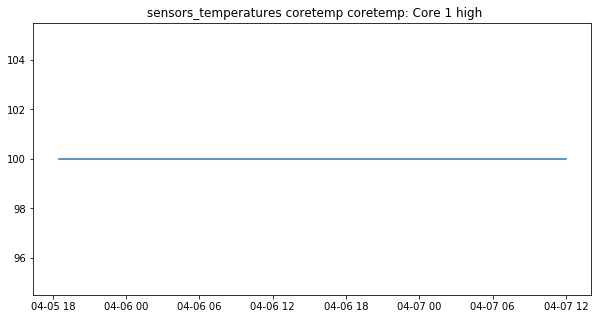

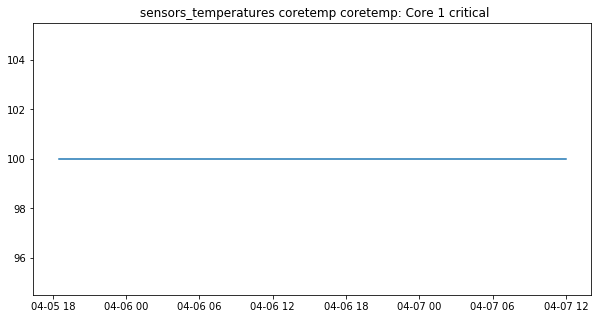

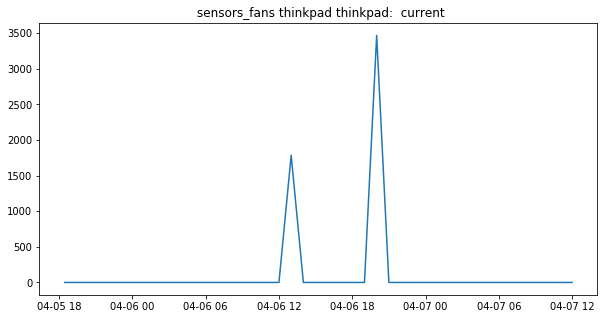

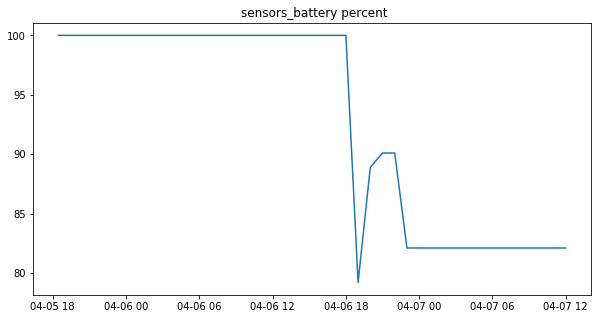

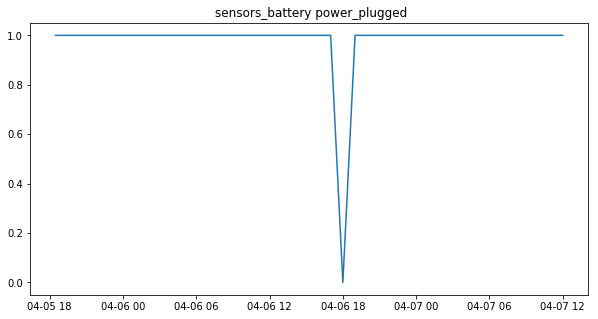

file: task-cpu.json


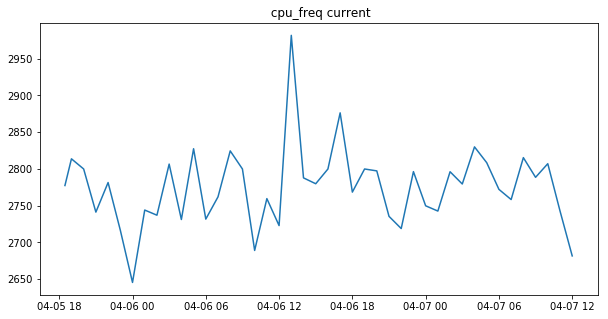

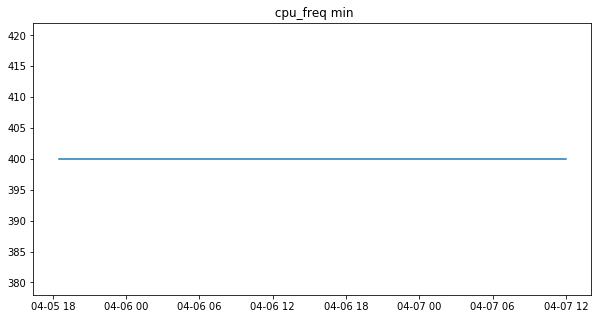

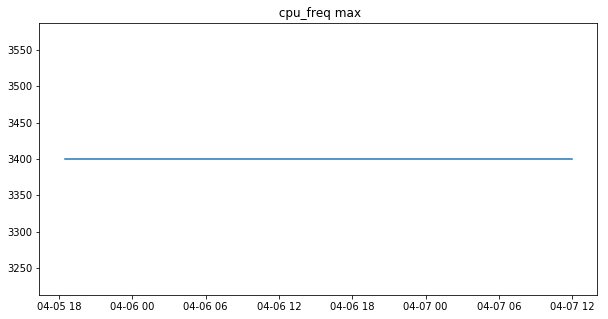

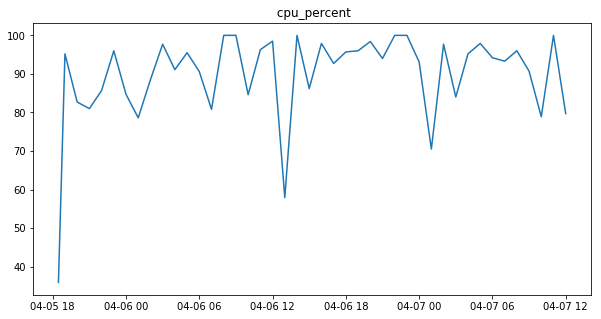

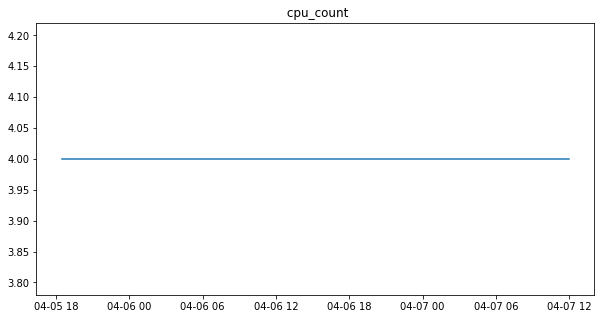

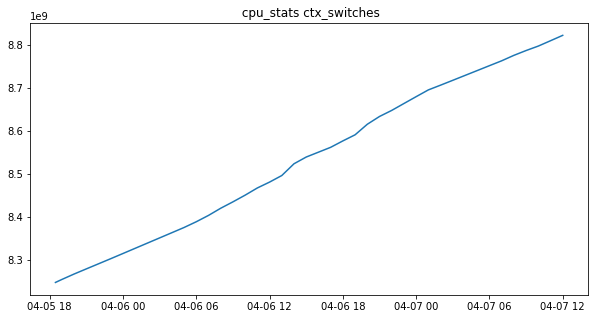

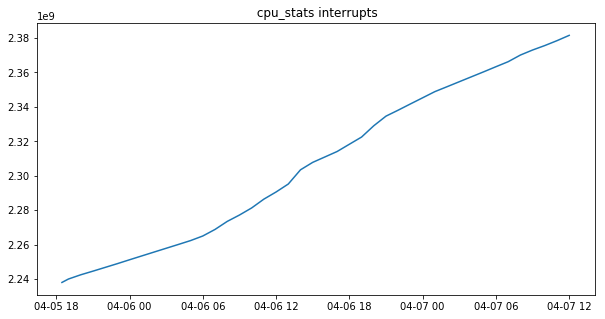

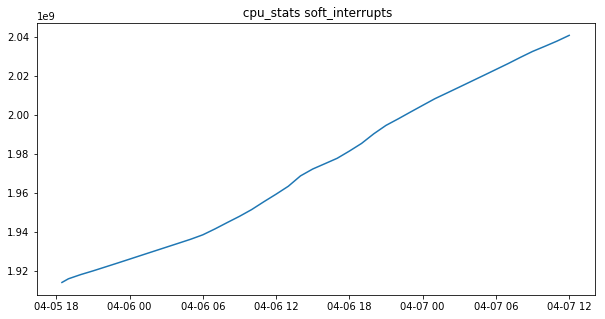

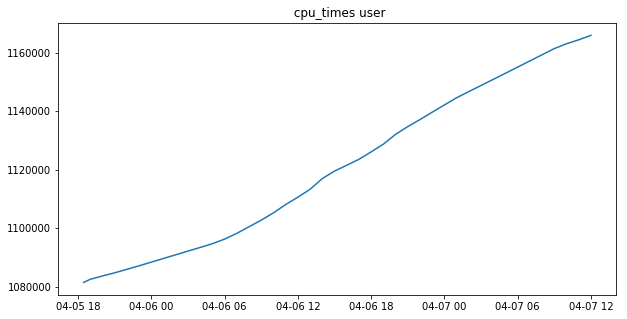

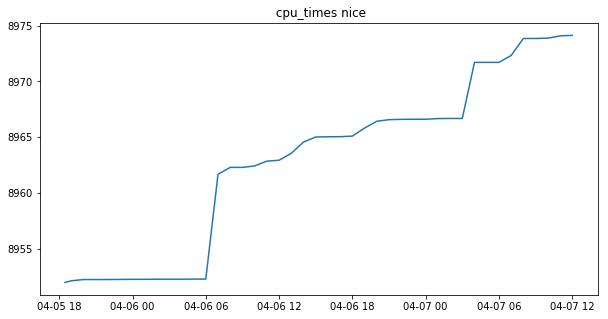

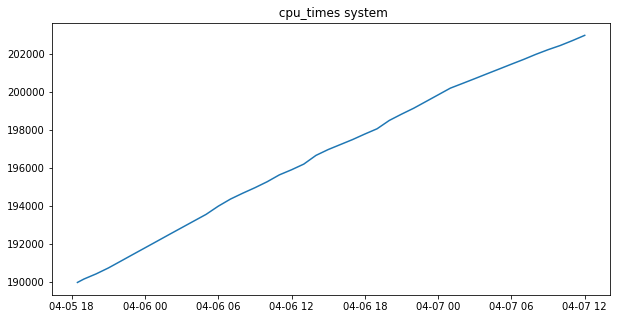

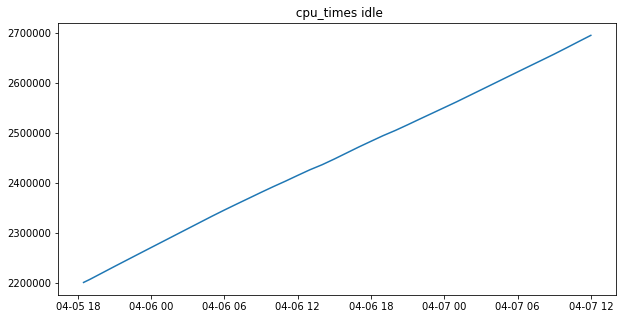

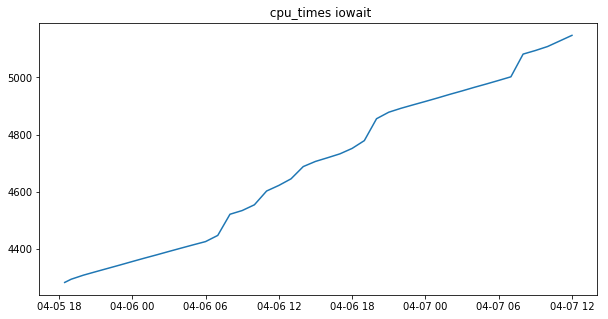

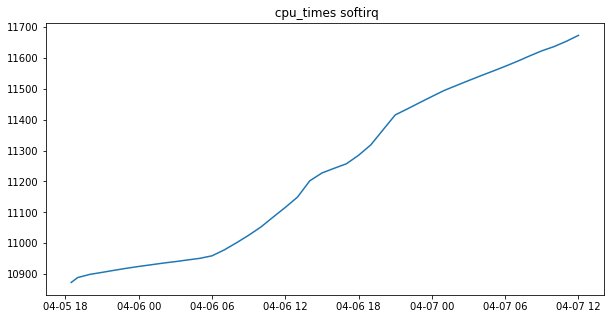

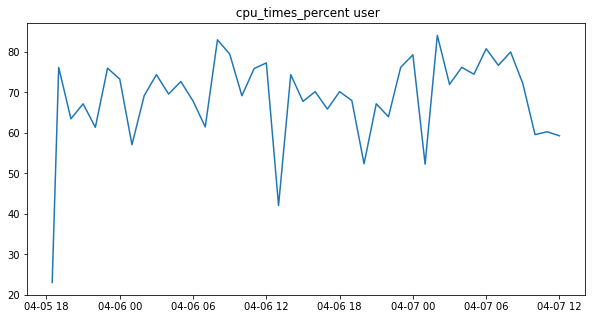

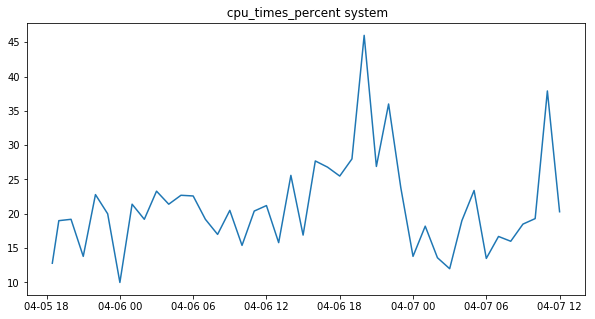

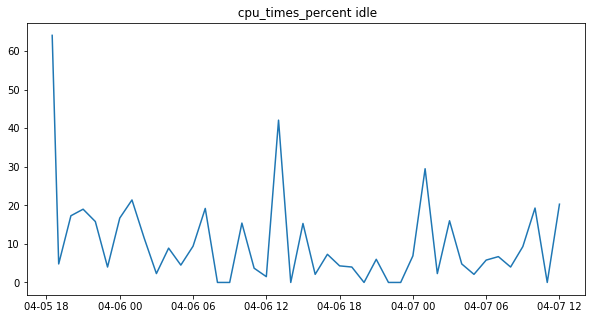

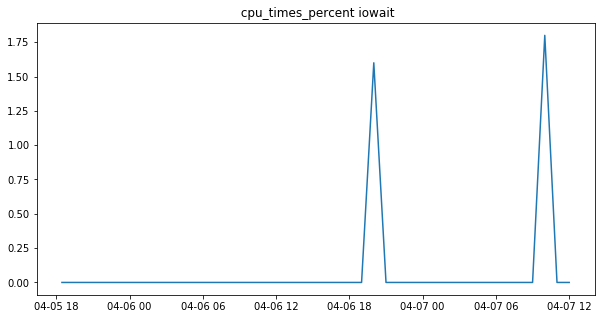

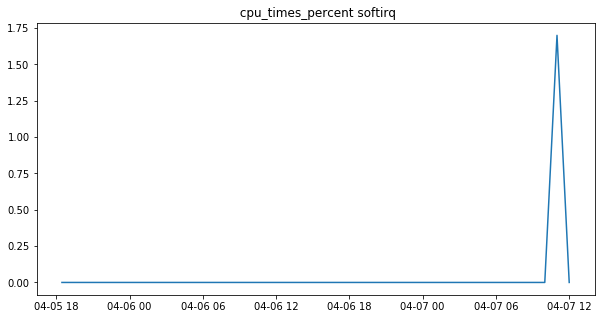

file: task-network.json


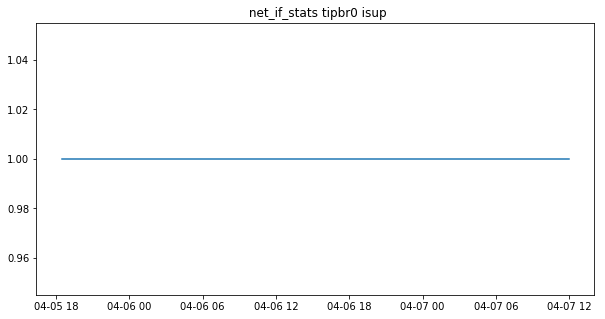

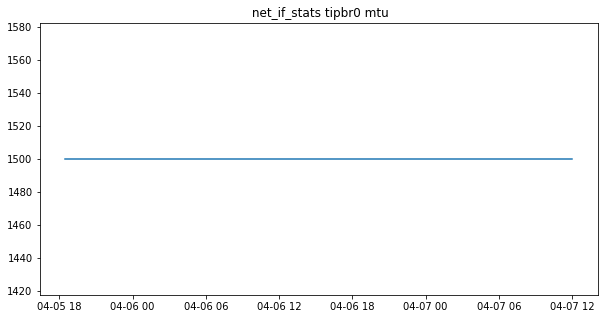

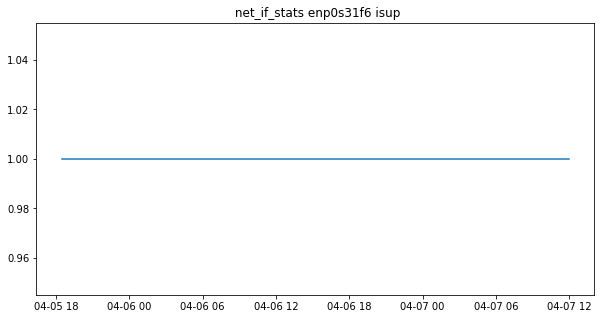

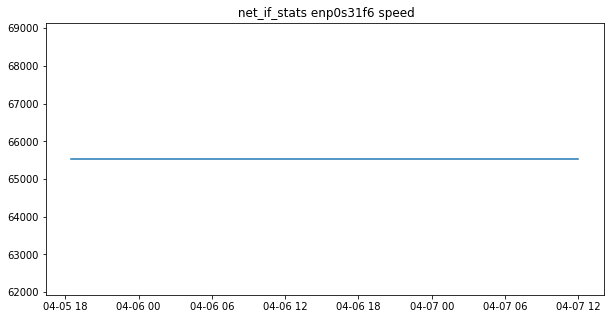

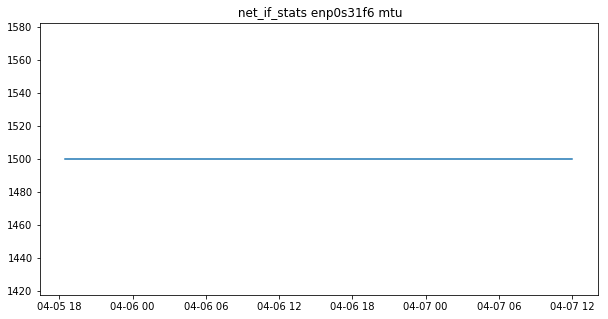

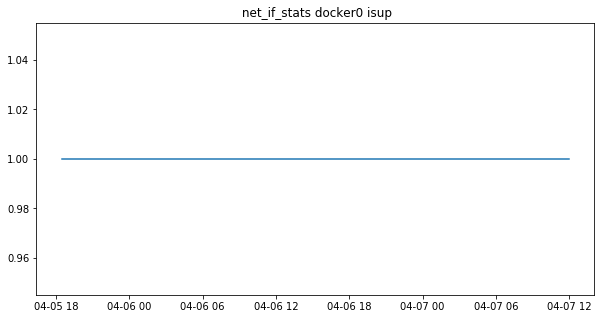

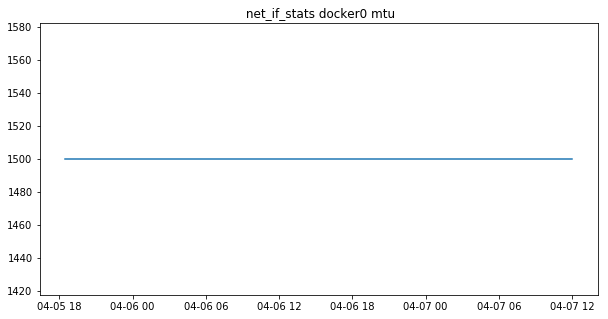

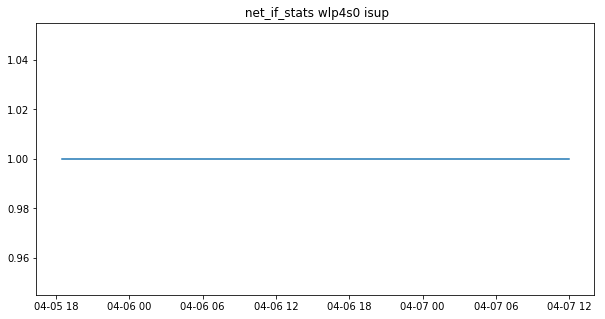

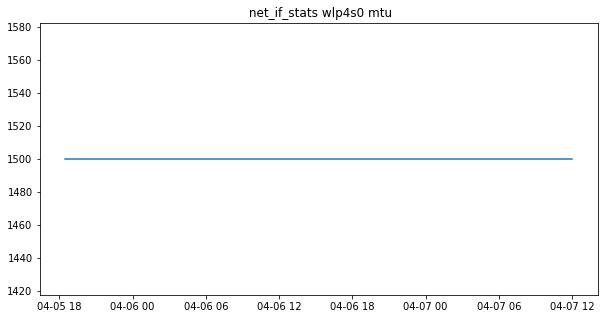

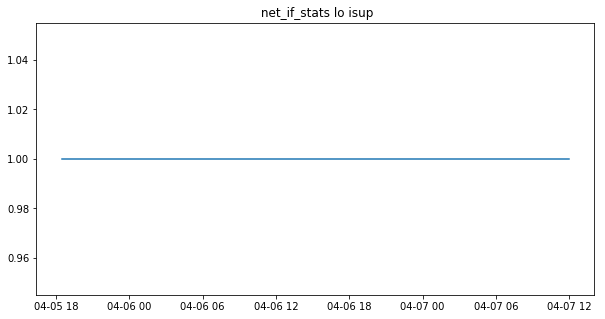

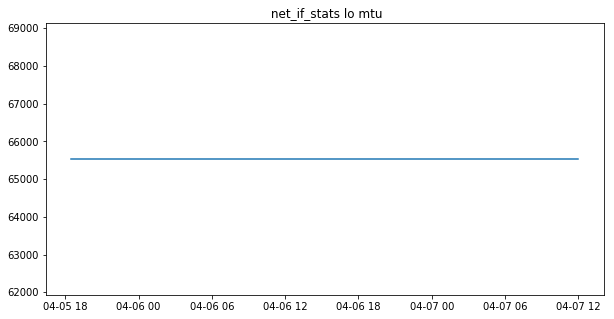

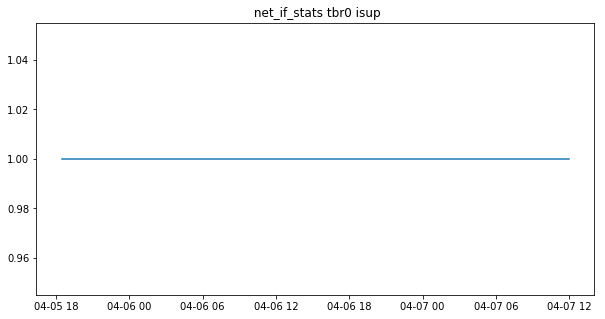

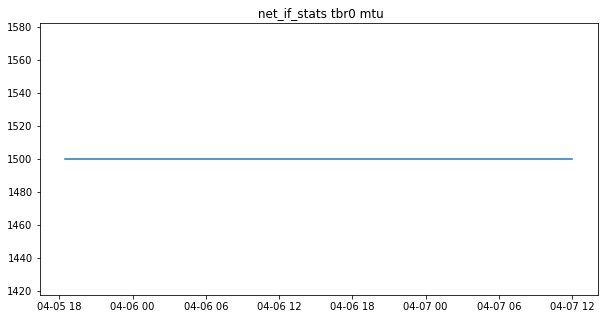

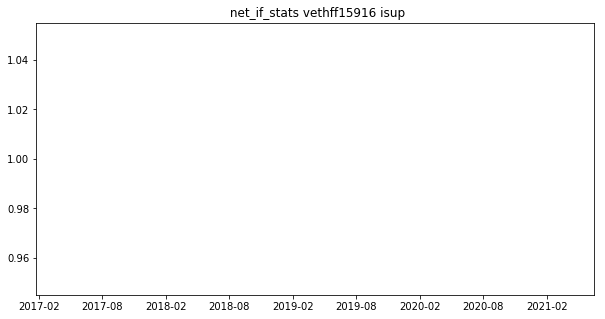

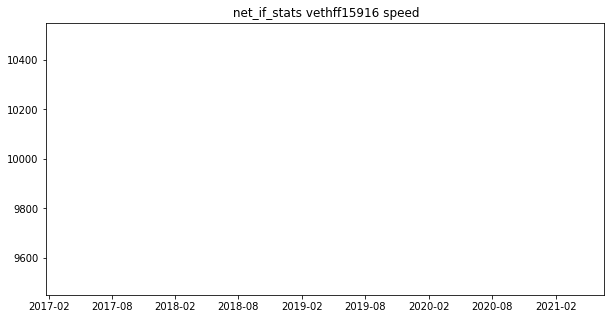

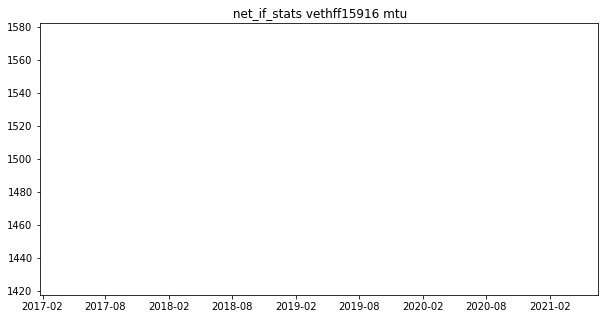

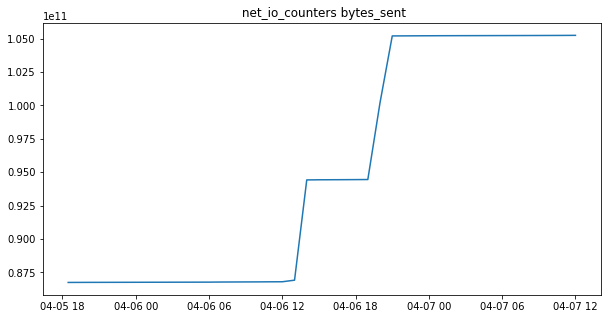

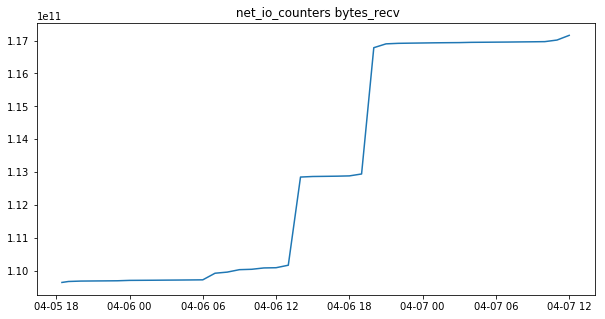

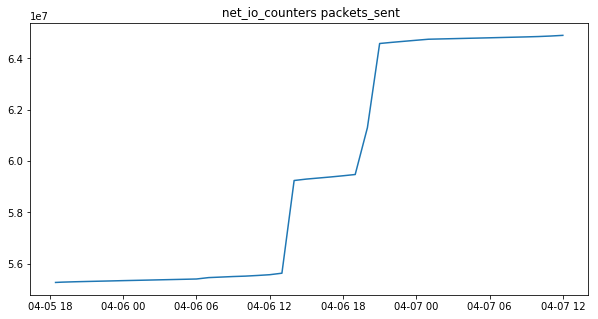

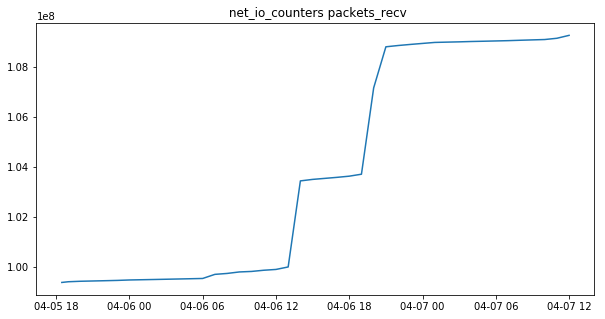

In [9]:
for json_file in json_files:
    with open(json_file) as f:
        print('file: %s' %json_file)
        data = json.load(f)
        process_and_plot(data)